In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
# Importing Dataset
df = pd.read_excel('EN071R_REGISTER POLI IMUN SDIDTK JAN - 18 SEPTEMBER.xls')

# Data Understanding & Cleaning

In [6]:
df.head()

,Unnamed: 0,No,Tanggal Kunjungan,Nama,Tanggal Lahir,Umur,Jenis Kelamin,Agama,Status,Pendidikan,...,Diagnosis,Keterangan Diagnosis,Anamnesa,Catatan Fisik,Catatan Dokter,Rujukan,Obat,Askep,Unnamed: 37,Unnamed: 38
0,NaN,1.0,2024-01-02,HA********EF ALFARIZI,2023-11-25,0 Tahun 9 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z23.2,BCG + POLIO 1,tidak ada keluhan \nsuntik BCG,tidak ada keluhan \nsuntik BCG,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,2024-01-02,AR********AHREZA,2023-12-27,0 Tahun 8 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z38.0,"KN 2, USIA 6HARI","tidak ada keluhan\nKN1\nasi +, mata belekan","tidak ada keluhan\nKN1\nasi +, mata belekan",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,2024-01-02,AQ********AH,2023-12-26,0 Tahun 8 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z38.0,"KN 2, USIA 7HARI",tidak ada keluhan\nKN 1\n,tidak ada keluhan\nKN 1\n,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,2024-01-02,AR********HURROHMAN,2023-11-28,0 Tahun 9 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z23.2,BCG,tidak ada keluhan,tidak ada keluhan,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,2024-01-02,AN********NDYA KHAIYANG,2023-01-29,1 Tahun 7 Bulan,WANITA,ISLAM,BELUM MENIKAH,SMA,...,Z27.4,"MR, IPV2",tidak ada keluhan,tidak ada keluhan,NaN,NaN,-PARASETAMOL SYR 120 MG/5 ML | 1 BOTOL,NaN,NaN,NaN


In [8]:
# Drop unnecessary column
df = df[['Umur', 'Jenis Kelamin', 'TB', 'INDEX PB/U']]
df

,Umur,Jenis Kelamin,TB,INDEX PB/U
0,0 Tahun 9 Bulan,PRIA,58.0,NORMAL
1,0 Tahun 8 Bulan,PRIA,50.0,NORMAL
2,0 Tahun 8 Bulan,PRIA,50.0,NORMAL
3,0 Tahun 9 Bulan,PRIA,55.0,NORMAL
4,1 Tahun 7 Bulan,WANITA,68.0,NORMAL
...,...,...,...,...
3433,NaN,NaN,NaN,NaN
3434,NaN,NaN,NaN,NaN
3435,NaN,NaN,NaN,NaN
3436,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Umur           3422 non-null   object 
 1   Jenis Kelamin  3422 non-null   object 
 2   TB             3391 non-null   float64
 3   INDEX PB/U     3422 non-null   object 
dtypes: float64(1), object(3)
memory usage: 107.6+ KB


In [12]:
df.describe()

,TB
count,3391.000000
mean,73.474359
std,24.091438
min,5.300000
25%,56.500000
50%,66.500000
75%,83.000000
max,173.000000


In [14]:
# Handling null values
df.isna().sum()

Umur             16
Jenis Kelamin    16
TB               47
INDEX PB/U       16
dtype: int64

In [16]:
df = df.dropna()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Umur           3391 non-null   object 
 1   Jenis Kelamin  3391 non-null   object 
 2   TB             3391 non-null   float64
 3   INDEX PB/U     3391 non-null   object 
dtypes: float64(1), object(3)
memory usage: 106.1+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

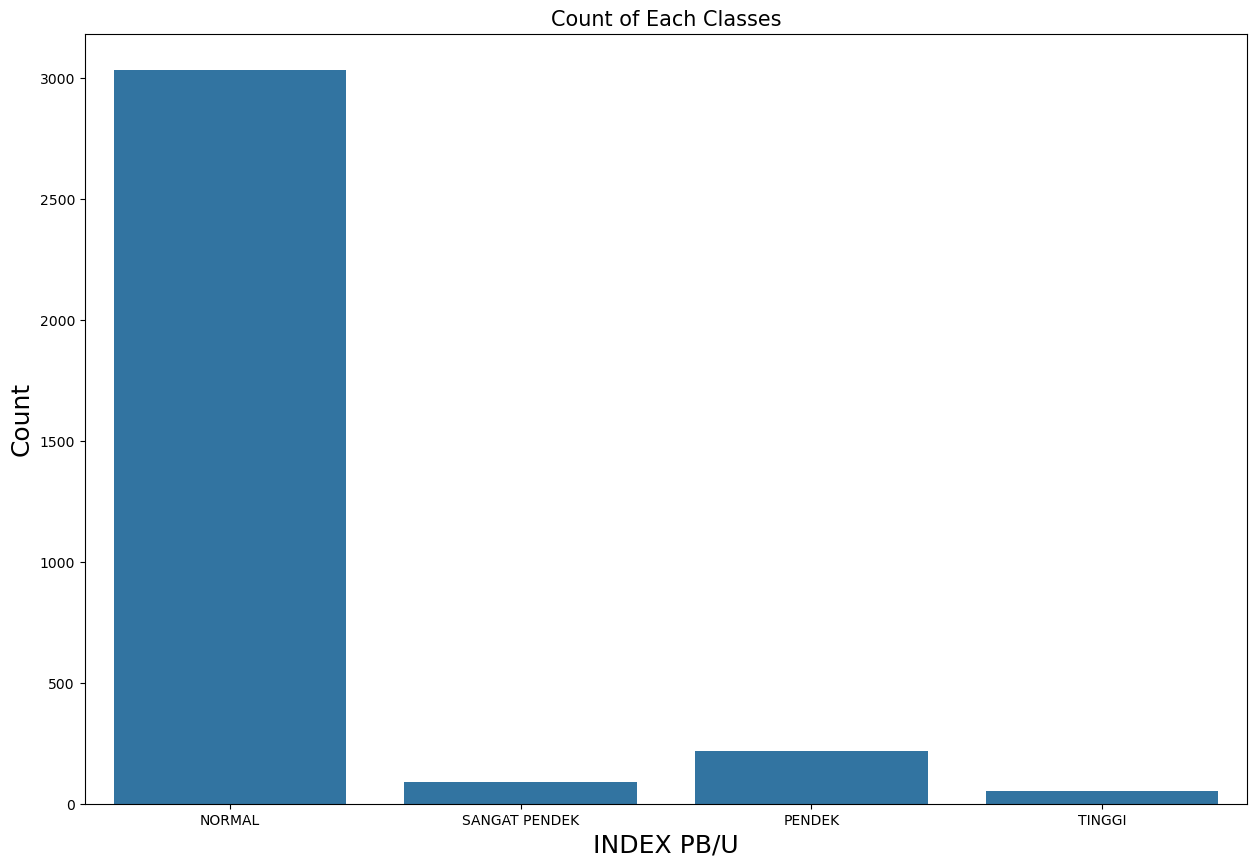

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x='INDEX PB/U', data=df)
plt.title('Count of Each Classes', fontsize=15)
plt.xlabel('INDEX PB/U', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show

In [20]:
df.rename(columns={'Umur': 'Age in Month', 'TB': 'Height', 'Jenis Kelamin': 'Gender'}, inplace=True)
df

,Age in Month,Gender,Height,INDEX PB/U
0,0 Tahun 9 Bulan,PRIA,58.0,NORMAL
1,0 Tahun 8 Bulan,PRIA,50.0,NORMAL
2,0 Tahun 8 Bulan,PRIA,50.0,NORMAL
3,0 Tahun 9 Bulan,PRIA,55.0,NORMAL
4,1 Tahun 7 Bulan,WANITA,68.0,NORMAL
...,...,...,...,...
3386,0 Tahun 3 Bulan,WANITA,61.0,NORMAL
3387,1 Tahun 7 Bulan,WANITA,98.0,TINGGI
3388,0 Tahun 0 Bulan,PRIA,47.0,NORMAL
3389,0 Tahun 1 Bulan,PRIA,54.0,NORMAL


In [22]:
# Convert Age Into Month
def convert_to_months(Age):
    # Separate the string
    parts = Age.split()
    year = int(parts[0])
    month = int(parts[2])
    # Convert and add months
    age_in_month = (year * 12) + month
    return age_in_month

df['Age in Month'] = df['Age in Month'].apply(convert_to_months)
df

,Age in Month,Gender,Height,INDEX PB/U
0,9,PRIA,58.0,NORMAL
1,8,PRIA,50.0,NORMAL
2,8,PRIA,50.0,NORMAL
3,9,PRIA,55.0,NORMAL
4,19,WANITA,68.0,NORMAL
...,...,...,...,...
3386,3,WANITA,61.0,NORMAL
3387,19,WANITA,98.0,TINGGI
3388,0,PRIA,47.0,NORMAL
3389,1,PRIA,54.0,NORMAL


In [24]:
# Convert Age in Month to Integer
df['Age in Month'] = df['Age in Month'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age in Month  3391 non-null   int32  
 1   Gender        3391 non-null   object 
 2   Height        3391 non-null   float64
 3   INDEX PB/U    3391 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 92.9+ KB


In [26]:
# Remove rows with Age in Month above 60
df = df[df['Age in Month'] <= 60]

# Reset index after filtering
df = df.reset_index(drop=True)

print(df['INDEX PB/U'].value_counts())

INDEX PB/U
NORMAL           2646
PENDEK            213
SANGAT PENDEK      88
TINGGI             49
Name: count, dtype: int64


# Data Pre-Processing

In [29]:
# Encode categorical column
df['Gender'] = df['Gender'].map({'PRIA':0, 'WANITA':1})
df['INDEX PB/U'] = df['INDEX PB/U'].map({'NORMAL':0, 'PENDEK':1, 'SANGAT PENDEK':2, 'TINGGI':3})
print(df['Gender'].unique())
print(df['INDEX PB/U'].unique())

[0 1]
[0 2 1 3]


In [31]:
# Split training and testing data
X = df.drop(["INDEX PB/U"], axis=1)
y = df["INDEX PB/U"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print(f'Total # of Sample in Whole Dataset: {len(X)}')
print(f'Total # of Sample in Train Dataset: {len(X_train)}')
print(f'Total # of Sample in Test Dataset: {len(X_test)}')

# K-fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Total # of Sample in Whole Dataset: 2996
Total # of Sample in Train Dataset: 2396
Total # of Sample in Test Dataset: 600


In [33]:
# Normalize numerical features
numerical_features = ['Age in Month', 'Height']
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the test data using the same scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_train[numerical_features].head()

,Age in Month,Height
772,-0.688916,-1.348719
2288,0.826687,1.634088
2292,-0.613136,-0.116690
390,0.523566,0.855964
1011,-0.688916,-0.894814


# Model Development

In [36]:
# initialize Random Classifier
xg = XGBClassifier()

# define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Specify multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

random_search = RandomizedSearchCV(estimator=xg,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of combinations to sample
                                   scoring=scoring,
                                   refit='f1',
                                   cv=kfold,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)  # For reproducibility

# Fit the model
random_search.fit(X_train, y_train)

# Retrieve the best model
best_xgboost_model_tb = random_search.best_estimator_

# Export the best model using joblib
joblib.dump(best_xgboost_model_tb, 'best_xgboost_model_tb.joblib')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


['best_xgboost_model_tb.joblib']

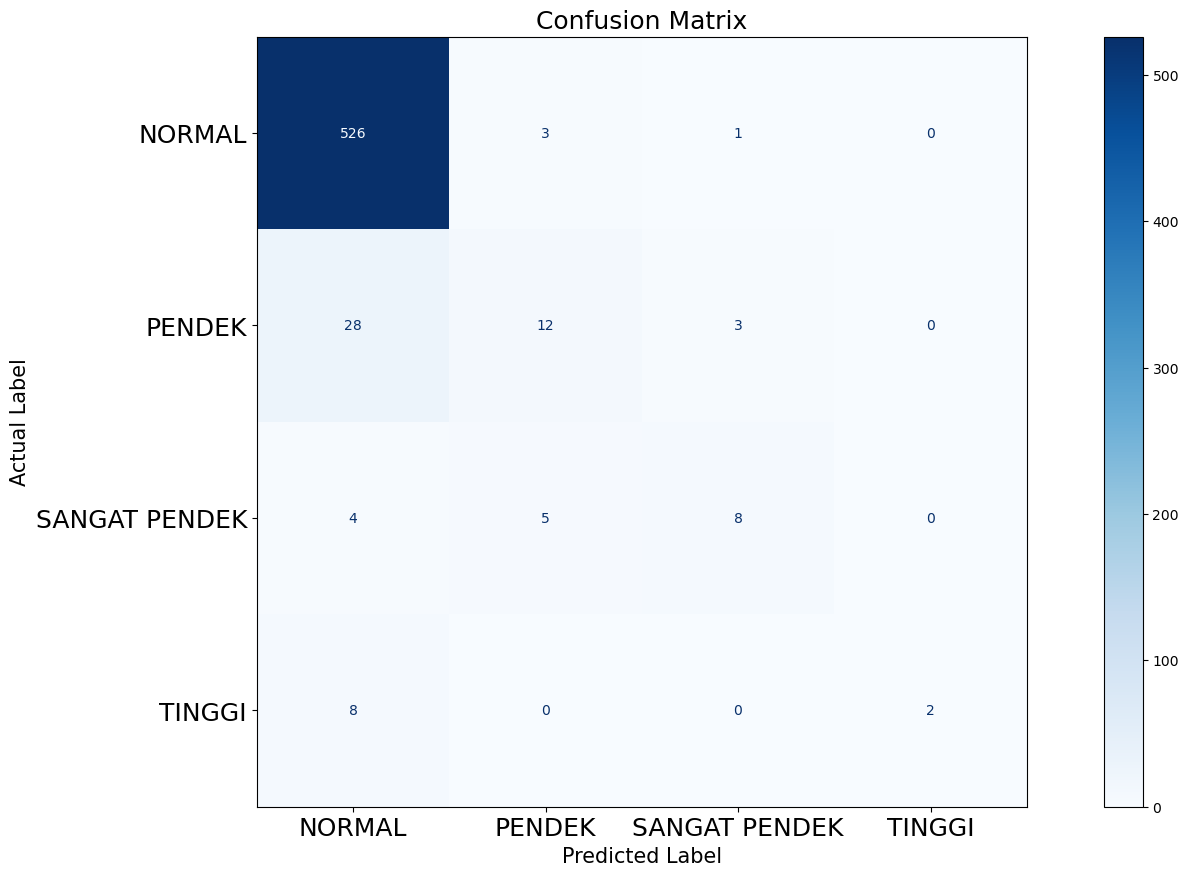

In [40]:
# Evaluate the model on the test data
y_pred = best_xgboost_model_tb.predict(X_test)
y_prob = best_xgboost_model_tb.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NORMAL', 'PENDEK', 'SANGAT PENDEK', 'TINGGI'])
fig, ax = plt.subplots(figsize=(20, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix", fontsize=18)
plt.ylabel("Actual Label", fontsize=15)
plt.xlabel("Predicted Label", fontsize=15)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [42]:
# Classification evaluation scores (Accuracy, Precision, Recall, F1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9133
Precision: 0.8995
Recall: 0.9133
F1 Score: 0.8964


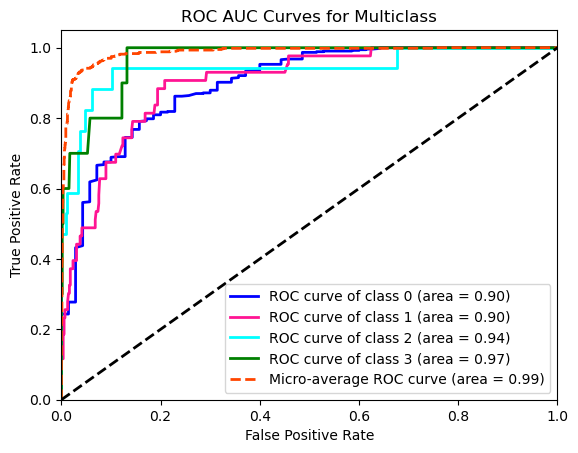

Micro-average ROC AUC (area = 0.99)
Macro-average ROC AUC (area = 0.93)


In [44]:
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))

# Binarize the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize dictionaries for FPR, TPR, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_binarized, y_prob, average="micro")

# Compute macro-average ROC AUC
roc_auc_macro = roc_auc_score(y_test_binarized, y_prob, average="macro")

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'deeppink', 'cyan', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='orangered', linestyle='--', lw=2,
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Print micro-average and macro-average ROC AUC
print("Micro-average ROC AUC (area = {:.2f})".format(roc_auc_micro))
print("Macro-average ROC AUC (area = {:.2f})".format(roc_auc_macro))

### SMOTE

# Data Pre-Processing

In [48]:
# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Before SMOTE:
INDEX PB/U
0    2116
1     170
2      71
3      39
Name: count, dtype: int64

After SMOTE:
INDEX PB/U
1    2116
0    2116
2    2116
3    2116
Name: count, dtype: int64


In [50]:
# Normalize numerical features
numerical_features = ['Age in Month', 'Height']
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_balanced[numerical_features] = scaler.fit_transform(X_train_balanced[numerical_features])

# Transform the test data using the same scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_train_balanced[numerical_features].head()

,Age in Month,Height
0,-0.783250,-1.156108
1,0.627728,1.226253
2,-0.712701,-0.172089
3,0.345533,0.604768
4,-0.783250,-0.793575


# Model Development

In [53]:
# initialize Random Classifier
xg = XGBClassifier()

# define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Specify multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

random_search = RandomizedSearchCV(estimator=xg,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of combinations to sample
                                   scoring=scoring,
                                   refit='f1',
                                   cv=kfold,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)  # For reproducibility

# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)

# Retrieve the best model
best_xgboost_model_smote_tb = random_search.best_estimator_

# Export the best model using joblib
joblib.dump(best_xgboost_model_smote_tb, 'best_xgboost_model_smote_tb.joblib')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


['best_xgboost_model_smote_tb.joblib']

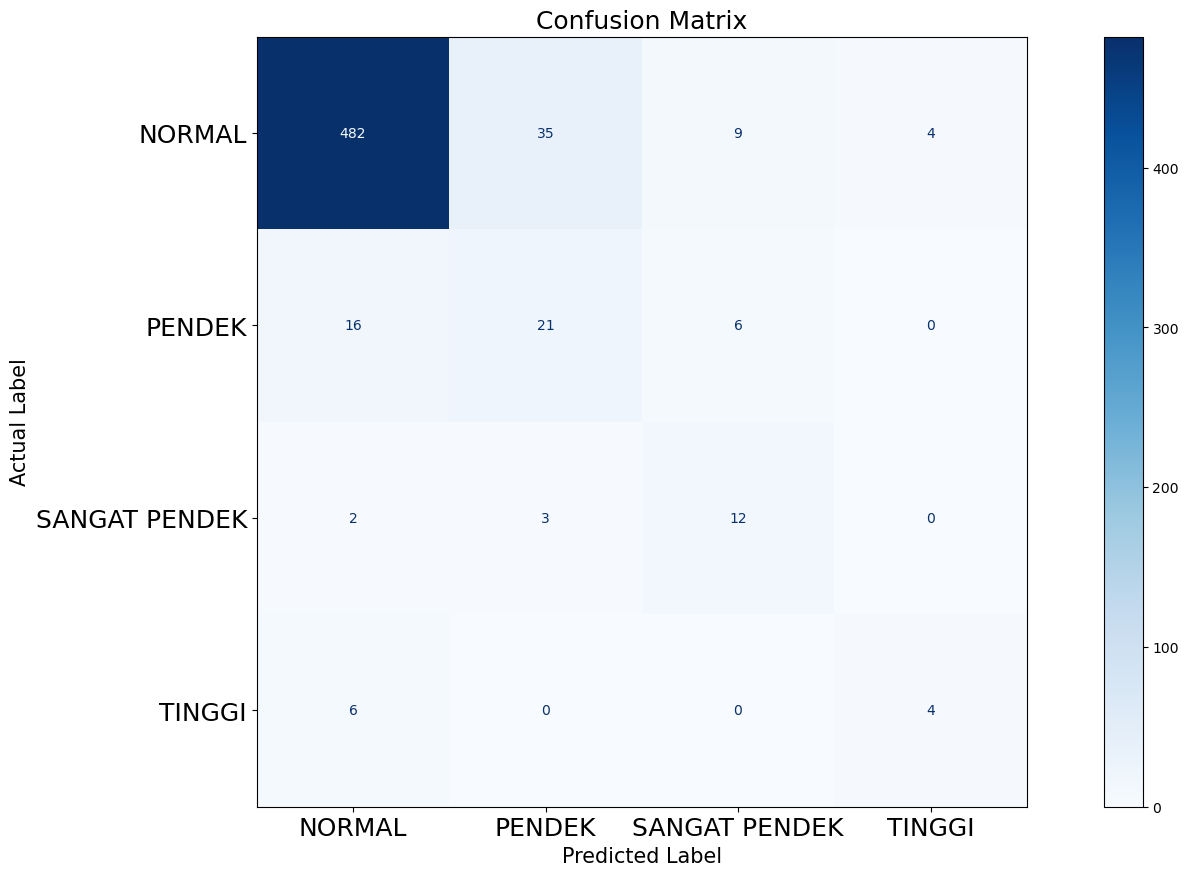

In [54]:
# Evaluate the model on the test data
y_pred = best_xgboost_model_smote_tb.predict(X_test)
y_prob = best_xgboost_model_smote_tb.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NORMAL', 'PENDEK', 'SANGAT PENDEK', 'TINGGI'])
fig, ax = plt.subplots(figsize=(20, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix", fontsize=18)
plt.ylabel("Actual Label", fontsize=15)
plt.xlabel("Predicted Label", fontsize=15)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [55]:
# Classification evaluation scores (Accuracy, Precision, Recall, F1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8650
Precision: 0.8879
Recall: 0.8650
F1 Score: 0.8743


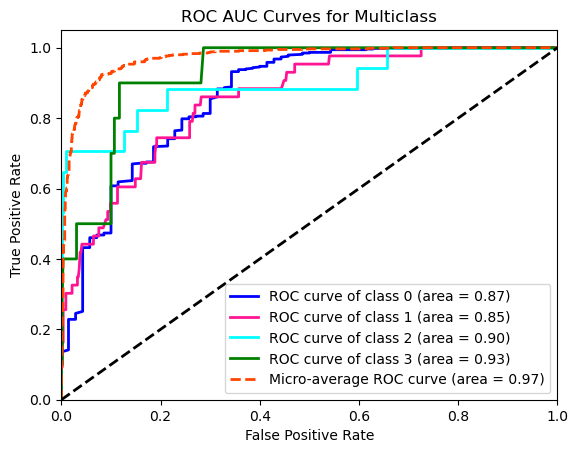

Micro-average ROC AUC (area = 0.97)
Macro-average ROC AUC (area = 0.89)


In [59]:
n_classes = len(np.unique(y_test))

# Binarize the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize dictionaries for FPR, TPR, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_binarized, y_prob, average="micro")

# Compute macro-average ROC AUC
roc_auc_macro = roc_auc_score(y_test_binarized, y_prob, average="macro")

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'deeppink', 'cyan', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='orangered', linestyle='--', lw=2,
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Print micro-average and macro-average ROC AUC
print("Micro-average ROC AUC (area = {:.2f})".format(roc_auc_micro))
print("Macro-average ROC AUC (area = {:.2f})".format(roc_auc_macro))